In [138]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

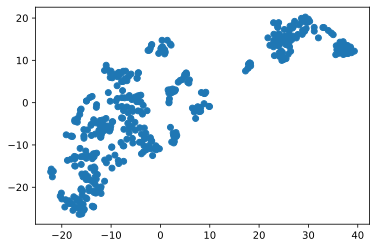

In [139]:
# Задание 1
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
target = boston['target']
y = pd.DataFrame(target, columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_standard = StandardScaler(with_mean=False)
X_train_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(X_train), columns=X_train.columns)
X_test_scaled_standard = pd.DataFrame(scaler_standard.transform(X_test), columns=X_test.columns)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne_standard = tsne.fit_transform(X_train_scaled_standard)
plt.scatter(X_train_tsne_standard[:, 0], X_train_tsne_standard[:, 1])
plt.show()

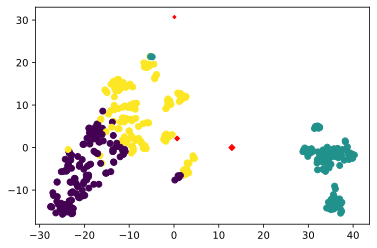

In [140]:
# Задание 2
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
scaler_min_max = MinMaxScaler()

train_scaled_min_max = pd.DataFrame(scaler_min_max.fit_transform(X_train), columns=X_train.columns)
train_labels = kmeans.fit_predict(train_scaled_min_max)
X_train_tsne_min_max = tsne.fit_transform(train_scaled_min_max)
centers = scaler_min_max.inverse_transform(kmeans.cluster_centers_)
plt.scatter(X_train_tsne_min_max[:, 0], X_train_tsne_min_max[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='D', color='red')
plt.show()

In [141]:
X_train = X_train.assign(clusters=train_labels)
X_train = X_train.assign(price=y_train)
groupby_train = X_train.groupby('clusters')
groupby_train.agg({"price": "mean", "CRIM": "mean"})

,price,CRIM
clusters,,
0,26.836879,0.096523
1,16.187379,12.927382
2,23.490625,0.705977


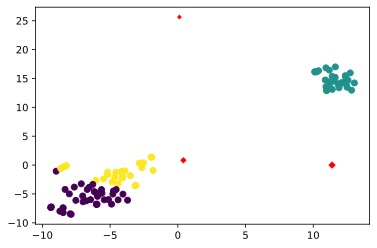

In [142]:
# Задание 3
test_scaled_min_max = pd.DataFrame(scaler_min_max.fit_transform(X_test), columns=X_test.columns)
test_labels = kmeans.fit_predict(test_scaled_min_max)
X_test_tsne_min_max = tsne.fit_transform(test_scaled_min_max)
centers = scaler_min_max.inverse_transform(kmeans.cluster_centers_)
plt.scatter(X_test_tsne_min_max[:, 0], X_test_tsne_min_max[:, 1], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='D', color='red')
plt.show()

In [143]:
X_test = X_test.assign(clusters=test_labels)
X_test = X_test.assign(price=y_test)
groupby_test = X_test.groupby('clusters')
groupby_test.agg({"price": "mean", "CRIM": "mean"})

,price,CRIM
clusters,,
0,26.741463,0.120165
1,16.816129,11.389174
2,19.136667,0.412180
